# Autoencodeur

Objectif : construire un autoencodeur à deux couches en utilisant Keras :
- l'encodeur compresse l'information dans l'espace latent
- le décodeur reconstruit l'image

## MNIST

La base de données MNIST (Mixed National Institute of Standards and Technology), est une base de données de chiffres manuscrits. C’est une base de données standard pour le test de nouveaux algorithmes de reconnaissance de ces chiffres. Elle est composée de 60000 images d’apprentissage et 10000 images de test. Les images en noir et blanc, normalisées centrées de 28 pixels de côté.

![mnist.png](./mnist.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow.keras as tk
from tensorflow.keras.datasets import mnist

from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input, Dense, Conv2D,Flatten,Reshape,Conv2DTranspose
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam

On charge ensuite les données MNIST. Les paramètres de la base sont récupérés (nombre d'exemples, de classes, taille de la rétine).

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


num_examples = x_train.shape[0]
num_test = x_test.shape[0]
num_input = x_train.shape[1]*x_train.shape[2]
num_classes = 10

img_size = x_train.shape[1]
img_shape = (img_size, img_size)


# normalisation
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.




11490434/11490434 [==============================] - 0s 0us/step


## Autoencodeur à couches convolutives


In [3]:
from IPython.core.inputtransformer2 import leading_empty_lines
from tensorflow.keras import Sequential
from tensorflow.keras.layers import  Input,Conv2D,MaxPool2D,Dense,BatchNormalization,LeakyReLU,Flatten, Reshape,Conv2DTranspose

dim_latent = 128
batch_size=256

# Encodeur
#TODO
encoder = Sequential()
encoder.add(Input(shape = (28,28,1)))
encoder.add(Conv2D(32,(3,3),padding = 'same',activation  ="relu"))
encoder.add(BatchNormalization())
encoder.add(LeakyReLU())
encoder.add(MaxPool2D(pool_size=(2, 2)))
encoder.add(Conv2D(64,(3,3),padding = 'same',activation  ="relu"))
encoder.add(BatchNormalization())
encoder.add(LeakyReLU())
encoder.add(MaxPool2D(pool_size=(2, 2)))
encoder.add(Flatten())
encoder.add(Dense(128,activation = "relu"))



# Decodeur
#TODO
decoder = Sequential()
decoder.add(Dense(3136))
decoder.add(Reshape((7,7,64)))
decoder.add(Conv2DTranspose(64,(8,8),activation  ="relu"))
decoder.add(LeakyReLU())
decoder.add(Conv2DTranspose(1,(15,15),activation  ="relu"))
decoder.add(BatchNormalization())
decoder.add(Activation("sigmoid"))



# AE
#TODO
class MyModel(tk.Model):

  def __init__(self):
    super().__init__()
    self.encoder = encoder
    self.decoder = decoder
  def call(self,inputs):
    h = self.encoder(inputs)
    return self.decoder(h)

model = MyModel()
model.build(input_shape = (None,28,28,1))

encoder.summary()
decoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 64)        2

In [4]:
model.compile(optimizer=Adam(1e-3), loss='binary_crossentropy',metrics=['acc'])
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128)               420736    
                                                                 
 sequential_1 (Sequential)   (None, 28, 28, 1)         681157    
                                                                 
Total params: 1101893 (4.20 MB)
Trainable params: 1101699 (4.20 MB)
Non-trainable params: 194 (776.00 Byte)
_________________________________________________________________


Epoch 1/5
232/235 [============================>.] - ETA: 0s - loss: 0.0829 - acc: 0.8154
Epoch -1 Précision :0.815 
313/313 [==============================] - 1s 2ms/step


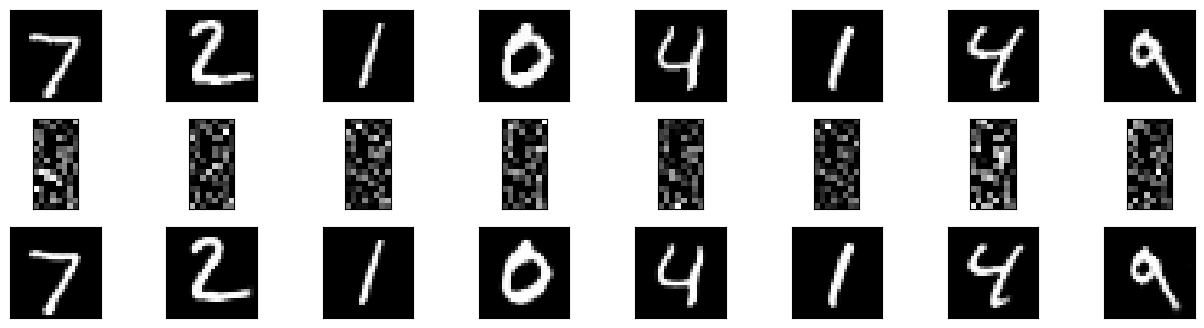

235/235 [==============================] - 7s 29ms/step - loss: 0.0829 - acc: 0.8154 - val_loss: 0.0823 - val_acc: 0.8144
Epoch 2/5
233/235 [============================>.] - ETA: 0s - loss: 0.0810 - acc: 0.8155
Epoch 0 Précision :0.815 
313/313 [==============================] - 1s 2ms/step


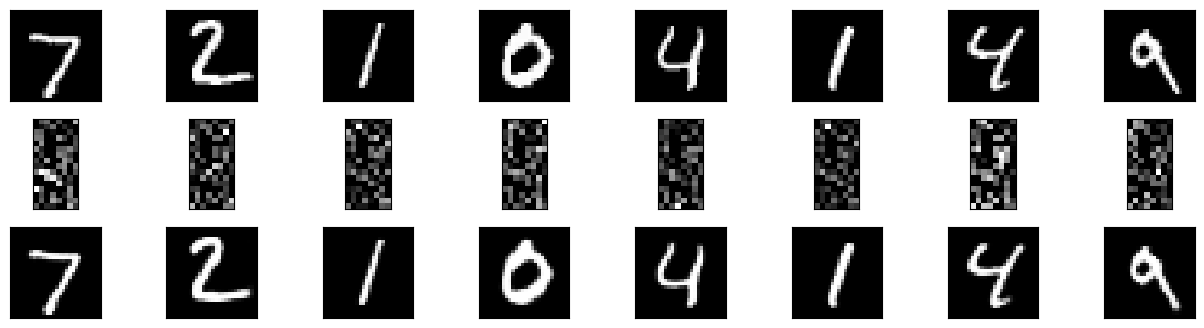

235/235 [==============================] - 6s 28ms/step - loss: 0.0810 - acc: 0.8155 - val_loss: 0.0819 - val_acc: 0.8144
Epoch 3/5
235/235 [==============================] - ETA: 0s - loss: 0.0795 - acc: 0.8155
Epoch 1 Précision :0.815 
313/313 [==============================] - 1s 3ms/step


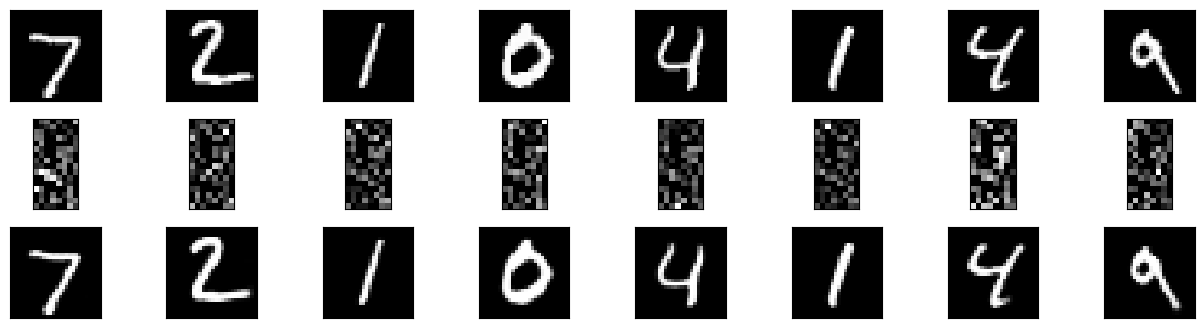

235/235 [==============================] - 8s 33ms/step - loss: 0.0795 - acc: 0.8155 - val_loss: 0.0791 - val_acc: 0.8145
Epoch 4/5
233/235 [============================>.] - ETA: 0s - loss: 0.0781 - acc: 0.8155
Epoch 2 Précision :0.815 
313/313 [==============================] - 1s 2ms/step


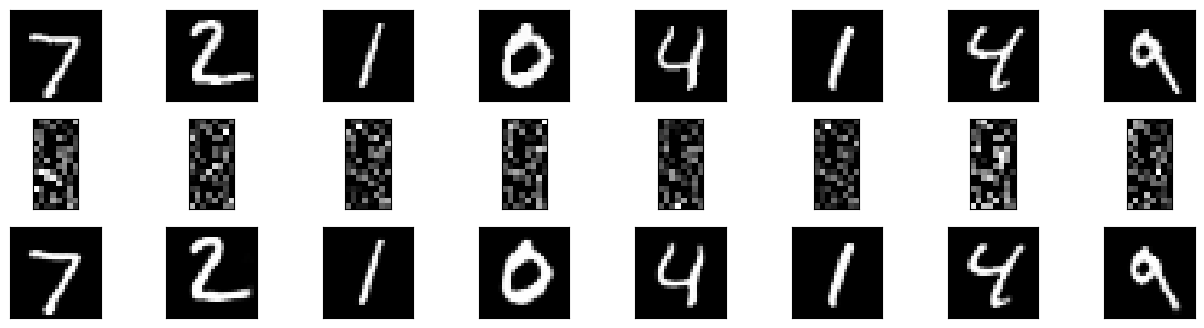

235/235 [==============================] - 7s 29ms/step - loss: 0.0781 - acc: 0.8155 - val_loss: 0.0782 - val_acc: 0.8144
Epoch 5/5
233/235 [============================>.] - ETA: 0s - loss: 0.0768 - acc: 0.8154
Epoch 3 Précision :0.815 
313/313 [==============================] - 1s 2ms/step


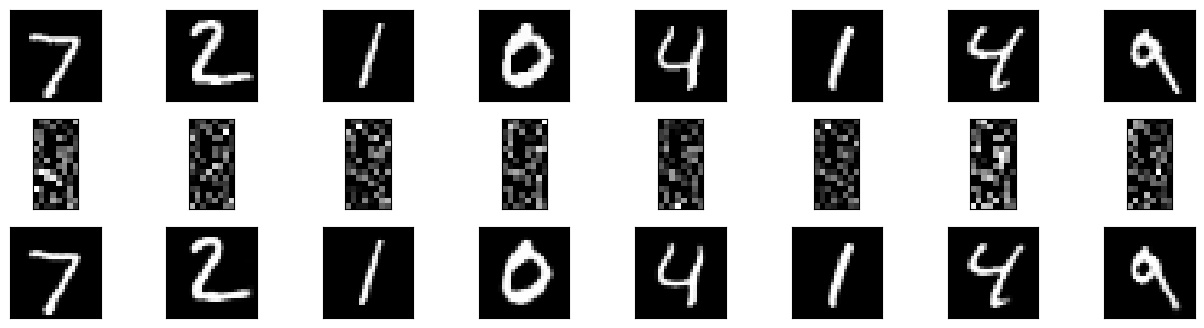

235/235 [==============================] - 7s 31ms/step - loss: 0.0768 - acc: 0.8155 - val_loss: 0.0765 - val_acc: 0.8145


In [6]:
class myCallback(tk.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if((epoch-1) % 1==0):
            print("\nEpoch {0:d} Précision :{1:5.3f} ".format(epoch-1,logs.get('acc') ))
            encoded_imgs = encoder.predict(x_test)
            decoded_imgs = model.predict(x_test)


            n = 8
            plt.figure(figsize=(40, 4))
            for i in range(n):
                ax = plt.subplot(3, 20, i + 1)
                plt.imshow(x_test[i].reshape(28, 28))
                plt.gray()
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)

                ax = plt.subplot(3, 20, i + 1 + 20)
                plt.imshow(encoded_imgs[i].reshape(16,8))
                plt.gray()
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)

                ax = plt.subplot(3, 20, 2*20 +i+ 1)
                plt.imshow(decoded_imgs[i].reshape(28, 28))
                plt.gray()
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)

            plt.show()


callbacks = myCallback()
model.fit(x_train,x_train,epochs=5,batch_size=batch_size,validation_data=(x_test, x_test),callbacks=[callbacks])